In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

# Neural Networks: List4 - Problem 2

Problem 1 was implemented in the neuron.py file.

Problem 2: Using the fameous Iris dataset use the Neuron class to preform classification.

Downloading the dataset.

In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

It conatins 3 different classes, but we want to discriminate *Iris setosa* vs others.

In [3]:
iris.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We construct feature and target sets.

In [4]:
targets = iris.iloc[:100,4].apply(lambda x: x == 'Iris-setosa').values.reshape((-1,1)).astype('int32')

In [5]:
samples = iris.iloc[0:100, [0, 2]].values.astype('float64')

Then, we initialize a Neuron object and train it with the data.

In [6]:
neuron = Neuron(loss_function='Cross_entropy', input_dimension=2)

In [7]:
logs = neuron.fit(samples, targets, epochs=1000, learning_rate=0.1, batch_size=1, message_frequency=100, verbose=False)

Time for some plotting.

First, there is a plot of the separation.

Then, there is plot of the loss function during the training precedure.

In [8]:
def plot(neuron, samples):
  plt.scatter(samples[:50, 0], samples[:50, 1], marker='+', label='Class 1', c='r')
  plt.scatter(samples[50:, 0], samples[50:, 1], marker='x', label='Class 0', c='b')
  X_plot = np.arange(3,8,0.01)
  Y_plot = X_plot * (-neuron.weights[0,0]/neuron.weights[0,1]) + neuron.bias/neuron.weights[0,1]
  plt.plot(X_plot, Y_plot, label='Decision boundary', c='g')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Separation of the two classes')
  plt.legend()
  plt.show()

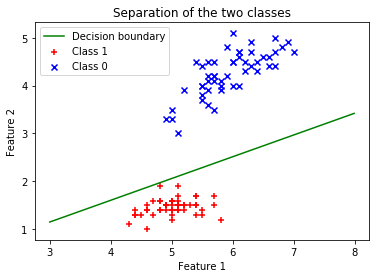

In [9]:
plot(neuron, samples)

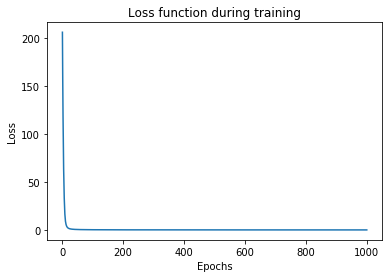

In [10]:
plt.plot(range(1,len(logs)+1), logs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss function during training')
plt.show()